Title: Popular Classification Algorithms

Logistic Regression


Task 1: Predict the likelihood of a student passing a test based on study hours.

Accuracy: 0.67
Confusion Matrix:
[[1 0]
 [1 1]]


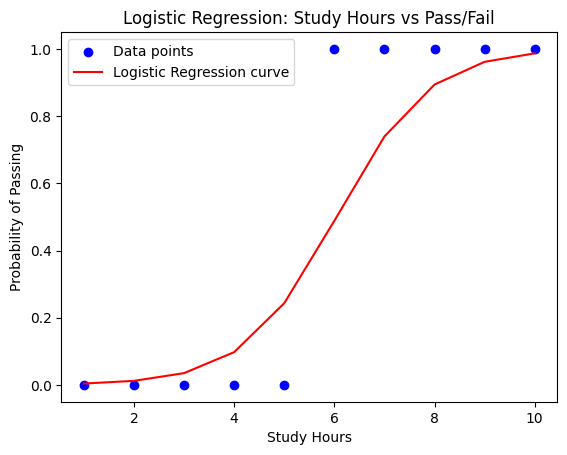

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate a simple dataset (study hours vs pass/fail)
data = pd.DataFrame({
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
        })
# Features and target
X = data[['Study Hours']]  # Features (study hours)
y = data['Pass']  # Target variable (pass/fail)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the dataset and Logistic Regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict_proba(X)[:, 1], color='red', label='Logistic Regression curve')
plt.title('Logistic Regression: Study Hours vs Pass/Fail')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()



Task 2: Predict customer churn based on service usage data.

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 2]]


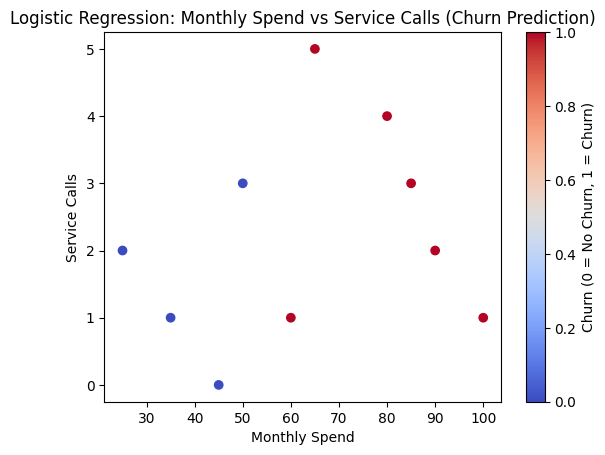

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate a sample dataset (service usage data vs churn)
data = pd.DataFrame({
    'Monthly Spend': [25, 35, 45, 50, 60, 65, 80, 85, 90, 100],
        'Service Calls': [2, 1, 0, 3, 1, 5, 4, 3, 2, 1],
            'Churn': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = No Churn, 1 = Churn
            })
# Features and target
X = data[['Monthly Spend', 'Service Calls']]  # Features (spend, service calls)
y = data['Churn']  # Target variable (churn/no churn)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the dataset and Logistic Regression decision boundary
# This is only possible in 2D features
plt.scatter(data['Monthly Spend'], data['Service Calls'], c=y, cmap='coolwarm', label='Data points')
plt.xlabel('Monthly Spend')
plt.ylabel('Service Calls')
plt.title('Logistic Regression: Monthly Spend vs Service Calls (Churn Prediction)')
plt.colorbar(label='Churn (0 = No Churn, 1 = Churn)')
plt.show()

Task 3: Classify if a review is positive or negative using NLP.

Accuracy: 0.00
Confusion Matrix:
[[0 2]
 [1 0]]


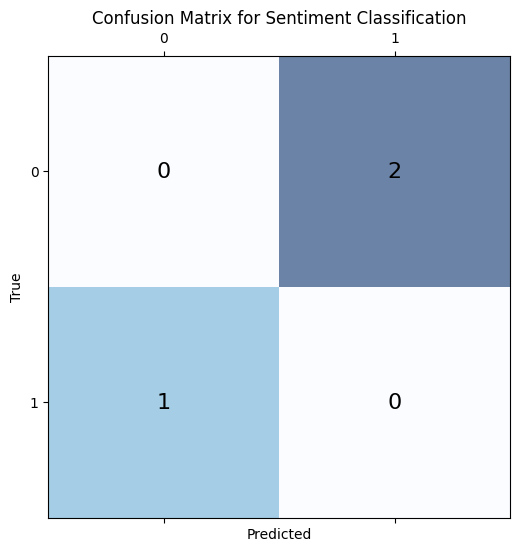

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Sample dataset of reviews and their sentiments (1 = Positive, 0 = Negative)
data = pd.DataFrame({
    'Review': [
            'I love this product', 'Worst purchase ever', 'Very satisfied with the quality', 
                    'Not worth the money', 'Amazing experience', 'Do not buy this', 
                            'I will buy this again', 'Extremely disappointed', 'Highly recommend this', 
                                    'Would not recommend this to anyone'
                                        ],
                                            'Sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
                                            })
# Features and target
X = data['Review']  # Reviews
y = data['Sentiment']  # Sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap='Blues', alpha=0.6)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
            ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', fontsize=16)
plt.title('Confusion Matrix for Sentiment Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
